# Statistical Learning to Predict House Prices
## CMSE381 - Honors Project
### Lian Martin

### Motivation and Introduction

The housing market is a very important aspect of our economy, but also to our everyday lives. The best memories are often created in our homes! This project will aim to predict housing prices given a data set. 

One of the most popular competitions on Kaggle is the House Prices: Advanced Regression Techniques. The original data comes from the publication Dean De Cock "Ames, Iowa: Alternative to the Boston Housing Data as an End of Semester Regression Project", Journal of Statistics Education, Volume 19, Number 3 (2011). In this Kaggle competition, we are given a training and testing data set in csv format.

For the purpose of this project, I will not be participating in the Kaggle competition, but rather utilizing the data set for my own academic purposes. With that being said, I will only be using the train data set as my raw  data set and performing a train test split on that data set. 

Training: Our training data consists of 1,460 examples of houses with 79 features describing every aspect of the house. We are given sale prices (the response) for each house.

79 features - that's a lot of features! This is also the reason why I am interested in this data set specifically. As a Data Scientist in training, I am looking to challenge myself with a larger data set than I am used to. In addition, using the Kaggle competition as motivation, I believe that this project is appropriate given my skill level and will also challenge my ability to intuit appropriate models based on the data set.

### Ethics in Boston Dataset
The data set used in this project is an alternative to the Boston housing data. It is important to note that the Boston data set has an ethical problem. Essentially, the authors of this data set have engineered a variable assuming that racial segregation positively influences sale price. For that reason, many professionals strongly discourage use of the Boston data set. The Ames, Iowa housing data set is an alternative to the Boston housing data, which is utilized in this project.

### The Dataset

To find more information, you can reference [this](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) page on Kaggle.

<p style="page-break-after:always;"></p>

### Exploratory Data Analysis

Let's begin by exploring what our data looks like.

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [2]:
# read in data
house = pd.read_csv('train.csv')
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
house.shape

(1460, 81)

- We have a lot of features in this data set, which very likely won't be explanatory! In fact, this was one of the reasons why I was interested in this data set. The best models are often relatively simple models, so my first instinct is to run a reduction model. We will get more into that later in the project. Let's continue exploring the data.

In [4]:
# check for na's
print(house.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [5]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
obj = (house.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (house.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (house.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 43
Integer variables: 35
Float variables: 3


Once again, the best models are relatively simple models, so looking at correlation will be helpful. Correlation is a statistical measure describing the size and direction of a relationship between two or more variables. The results are shown below.

In [7]:
corr_mat = house.corr()
corr_mat

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


<AxesSubplot: >

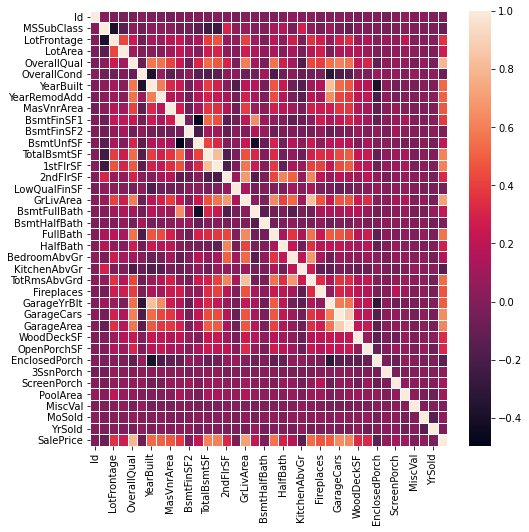

In [11]:
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr_mat, linewidth = 0.5)

<AxesSubplot: >

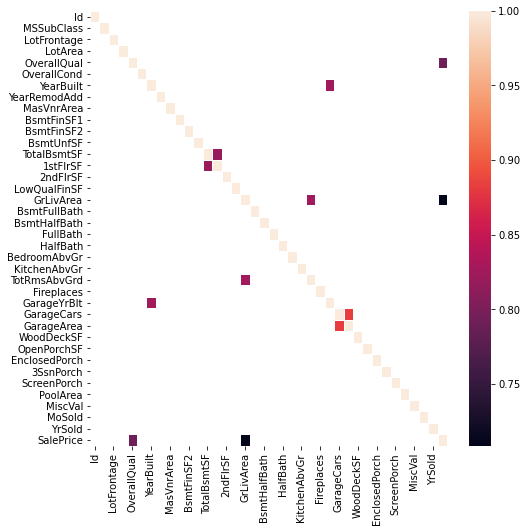

In [12]:
f, ax = plt.subplots(figsize=(8,8))
sns.heatmap(corr_mat,mask = corr_mat < 0.7, linewidth = 0.5)

In [13]:
corr_mat['SalePrice'].sort_values(ascending=False).head(10)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

In [14]:
#take negative correlations into account
corr_mat['SalePrice'].sort_values(ascending=True).head(10)

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
Name: SalePrice, dtype: float64

1. The higher the correlation of an input variable with target, the more useful that input variable will be in predicting the target. The variables most highly correlated with SalePrice are as followed (also printed above):
- OverallQual
- GrLivArea
- GarageCars
- GarageArea
- Total BsmtSF
- 1stFlrSF
- FullBath
- TotRmsAbvGrd
- YearBuilt
2. Multicollinearity occurs when independent variables are correlated with each other. Multicollinearity can result in less reliable models, so it is important that we note these variables. Specifically, we see high correlation between:
- YearBuilt and GarageYrBlt
- TotalBsmtSF and 1stFlrSF
- GrLivArea and TotRmsAbvGrd
- GarageArea and GarageCars

Let's begin by visualizing the relationship between a couple of the highly correlated variables with SalePrice.

Text(0, 0.5, 'SalePrice')

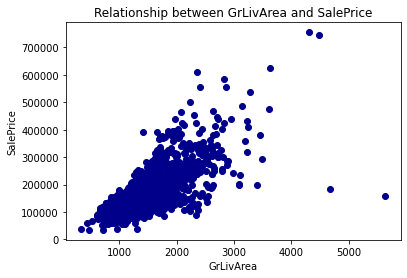

In [15]:
plt.figure(figsize=(6, 4))
plt.scatter(house['GrLivArea'], house['SalePrice'], color = 'darkblue')
plt.title("Relationship between GrLivArea and SalePrice")
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

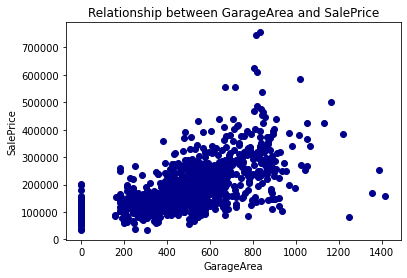

In [16]:
plt.figure(figsize=(6, 4))
plt.scatter(house['GarageArea'], house['SalePrice'], color = 'darkblue')
plt.title("Relationship between GarageArea and SalePrice")
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

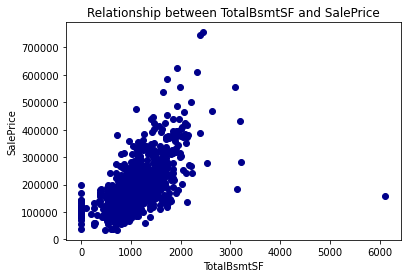

In [17]:
plt.figure(figsize=(6, 4))
plt.scatter(house['TotalBsmtSF'], house['SalePrice'], color = 'darkblue')
plt.title("Relationship between TotalBsmtSF and SalePrice")
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

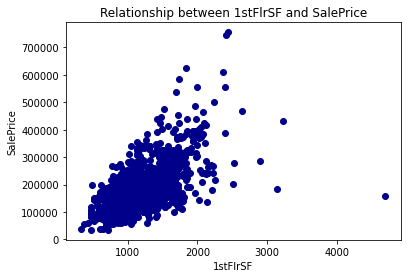

In [18]:
plt.figure(figsize=(6, 4))
plt.scatter(house['1stFlrSF'], house['SalePrice'], color = 'darkblue')
plt.title("Relationship between 1stFlrSF and SalePrice")
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')

Text(0, 0.5, 'SalePrice')

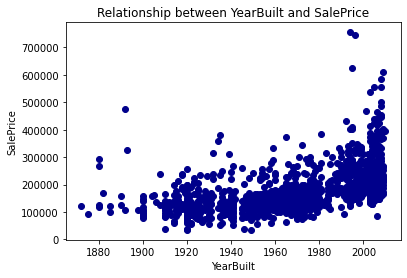

In [19]:
plt.figure(figsize=(6, 4))
plt.scatter(house['YearBuilt'], house['SalePrice'], color = 'darkblue')
plt.title("Relationship between YearBuilt and SalePrice")
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')

<p style="page-break-after:always;"></p>

### Data Cleaning

"Garbage in, garbage out." That is, your model can only be good as the input data. Data cleaning is one of the most important aspects of a Data Science project. Clean, reliable data will help lead us to a reliable model.

#### Addressing the Outliers and Multicollinearity

Data Science projects are never linear. In my first run of the project, I found outliers in my results. At this point, we are going to address the outliers. Specifically, I am going to be removing outliers from the features with the most correlation to SalePrice. These features include `GrLivArea`, `GarageArea`, `TotalBsmtSF`, and `1stFlrSF`. We will be dropping `GrLivArea` shortly due to multicollinearity, so no need to remove outliers.

In [20]:
drop_index = house[(house["SalePrice"] < 200000) & (house["GrLivArea"] > 4000)].index
house_clean = house.drop(drop_index, axis = 0)

Text(0, 0.5, 'SalePrice')

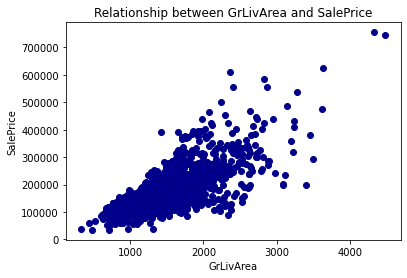

In [21]:
plt.figure(figsize=(6, 4))
plt.scatter(house_clean['GrLivArea'], house_clean['SalePrice'], color = 'darkblue')
plt.title("Relationship between GrLivArea and SalePrice")
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')

In [22]:
drop_index = house[(house["TotalBsmtSF"] > 3000)].index
house_clean = house.drop(drop_index, axis = 0)

Text(0, 0.5, 'SalePrice')

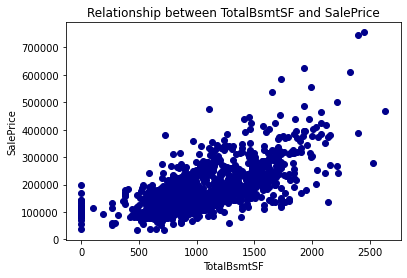

In [24]:
plt.figure(figsize=(6, 4))
plt.scatter(house_clean['TotalBsmtSF'], house_clean['SalePrice'], color = 'darkblue')
plt.title("Relationship between TotalBsmtSF and SalePrice")
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')

- In visualizing our variables above, we have eliminated some of the outliers.
- Let's also drop the `GarageYrBlt`, `1stFlrSF`, `TotRmsAbvGrd`, `GarageArea` columns all together. These columns were correlated with other features, so removing them will help us avoid multicollinearity.

In [25]:
house_clean = house.drop(columns = ['GarageYrBlt', '1stFlrSF', 'TotRmsAbvGrd'])

#### Addressing NaN Values

In our EDA section, we saw a lot of NaN values. Let's also start exploring those. We have a couple of options. We can either: drop all NaN's, fill NaN's with none/0, fill NaN's with mode, median, mean, or feature engineer the NaN's. Let's begin by understanding how many NaN values we have.

In [26]:
na_perc = (house.isnull().sum()/1460) * 100
na_perc = na_perc[na_perc > 0].reset_index()
na_perc.columns = ['col_names', 'perc_na']
na_perc

,col_names,perc_na
0,LotFrontage,17.739726
1,Alley,93.767123
2,MasVnrType,0.547945
3,MasVnrArea,0.547945
4,BsmtQual,2.534247
5,BsmtCond,2.534247
6,BsmtExposure,2.602740
7,BsmtFinType1,2.534247
8,BsmtFinType2,2.602740
9,Electrical,0.068493


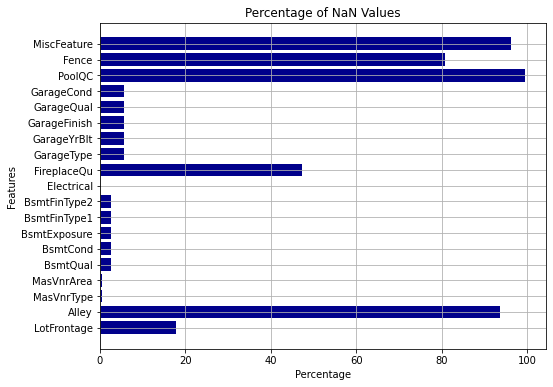

In [75]:
plt.figure(figsize=(8, 6))
plt.barh(na_perc['col_names'], na_perc['perc_na'], color = 'darkblue')
plt.title('Percentage of NaN Values')
plt.xlabel('Percentage')
plt.ylabel('Features')
plt.grid()
#plt.bar_label(na_perc['perc_na'])

- The plot above visualizes the percentage of NaN values. In particular, we see a large percentage of NaN values for `MiscFeature`, `Fence`, `PoolQC`, `FireplaceQu`, and `Alley`. We should drop those columns completely since they do not add value to the data set. We should also definitely drop the `Id` column, since this is just an identifier feature.
- There are more advanced methods I could apply to addressing the NaN values, but I decided to continue dropping all rows with any NaN's left for simplicity.

In [29]:
house_clean = house.drop(columns = ['Id','PoolQC', 'Fence', 'MiscFeature', 'Alley', 'FireplaceQu'])
house_clean = house_clean.dropna(axis=0)
house_clean[house_clean.isna().any(axis=1)] #check

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [30]:
house_clean = pd.get_dummies(house_clean, drop_first = True)
house_clean.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [31]:
X = house_clean.drop(columns = 'SalePrice')
print(X.shape)
y = house_clean['SalePrice']
print(y.shape)

(1094, 221)
(1094,)


<p style="page-break-after:always;"></p>

### Linear Regression

Let's begin by creating a traditional linear regression model. Linear regression is used to predict the value of a variable based on the value of other variables. I will also apply shrinkage methods, so linear regression will give us a baseline to how our model is doing.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(875, 221)
(219, 221)
(875,)
(219,)


In [33]:
reg = LinearRegression()
#pass in the data we want to fit
reg.fit(X_train,y_train)
pred = reg.predict(X_test)
mse_reg = mean_squared_error(y_test,pred)
print(mse_reg)

2673282260.6548767


In [34]:
score_reg = reg.score(X_test, y_test)
print(score_reg)

0.6239164196787454


In [35]:
d = {'true y': y_test, 'pred': pred}
df = pd.DataFrame(data = d)
df

,true y,pred
1299,154000,153142.130874
575,118500,121254.215467
1376,91000,75010.764822
892,154500,157010.755716
1068,151400,223167.723066
...,...,...
96,214000,217129.281764
857,174000,154116.070904
916,35311,-15060.951794
273,139000,142740.566487


Text(0, 0.5, 'Prediction Y')

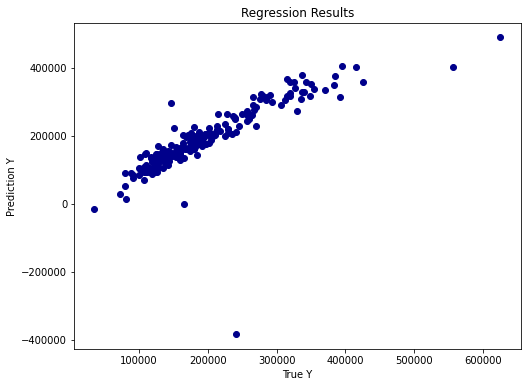

In [36]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, color = 'darkblue')
plt.title("Regression Results")
plt.xlabel('True Y')
plt.ylabel('Prediction Y')

- R-squared represents the proportion of the variance for a dependent variable that's explained by independent variables in a regression model.
- Our linear regression model has an R^2 score of 0.62. I believe that we can do better. Let's explore reduction methods we can perform on the data.

<p style="page-break-after:always;"></p>

### Ridge Regression

As stated, we have many features - 220 to be exact! The best models are relatively simple models, so my first instinct was to perform a reduction method. Let's apply Ridge Regression.

Ridge Regression is a shrinkage method where we aim to constrain coefficient estimates toward 0. Ridge is most suitable when the number of predictors is larger than the number of data points. Although this is not the case, we still have a large number of predictors that I would like to shrink to see if our model improves. Ridge regression also works best when least squares estimates have high variance. 

In [37]:
X_normalized = X/X.std()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(875, 221)
(219, 221)
(875,)
(219,)


In [39]:
alphas = 10**np.linspace(4,-2,100)*0.5
alphas

array([5.00000000e+03, 4.34874501e+03, 3.78231664e+03, 3.28966612e+03,
       2.86118383e+03, 2.48851178e+03, 2.16438064e+03, 1.88246790e+03,
       1.63727458e+03, 1.42401793e+03, 1.23853818e+03, 1.07721735e+03,
       9.36908711e+02, 8.14875417e+02, 7.08737081e+02, 6.16423370e+02,
       5.36133611e+02, 4.66301673e+02, 4.05565415e+02, 3.52740116e+02,
       3.06795364e+02, 2.66834962e+02, 2.32079442e+02, 2.01850863e+02,
       1.75559587e+02, 1.52692775e+02, 1.32804389e+02, 1.15506485e+02,
       1.00461650e+02, 8.73764200e+01, 7.59955541e+01, 6.60970574e+01,
       5.74878498e+01, 5.00000000e+01, 4.34874501e+01, 3.78231664e+01,
       3.28966612e+01, 2.86118383e+01, 2.48851178e+01, 2.16438064e+01,
       1.88246790e+01, 1.63727458e+01, 1.42401793e+01, 1.23853818e+01,
       1.07721735e+01, 9.36908711e+00, 8.14875417e+00, 7.08737081e+00,
       6.16423370e+00, 5.36133611e+00, 4.66301673e+00, 4.05565415e+00,
       3.52740116e+00, 3.06795364e+00, 2.66834962e+00, 2.32079442e+00,
      

In [40]:
alphas = alphas[:-1]


ridgecv = RidgeCV(alphas = alphas, 
                  scoring = 'neg_mean_squared_error', 
                  normalize = True)
ridgecv.fit(X_train, y_train)
print('alpha chosen is', ridgecv.alpha_)

/home/mart2162/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alphas to: original_alphas * n_samples. 
  warnings.warn(


alpha chosen is 0.6609705742330143


In [41]:
pred = ridgecv.predict(X_test)
mse_ridge = mean_squared_error(y_test,pred)
print(mse_ridge)

855750178.4096524


In [42]:
#r^2 score
score_ridge = ridgecv.score(X_test, y_test)
print(score_ridge)

0.8796110699967707


In [43]:
pd.Series(ridgecv.coef_, index = X.columns)

MSSubClass              -2579.121657
LotFrontage               890.566620
LotArea                  2981.814382
OverallQual              8561.048208
OverallCond              2955.758394
                            ...     
SaleCondition_AdjLand       0.000000
SaleCondition_Alloca      250.392092
SaleCondition_Family     -813.209273
SaleCondition_Normal       79.581244
SaleCondition_Partial    1811.579107
Length: 221, dtype: float64

In [44]:
d = {'true y': y_test, 'pred': pred}
df = pd.DataFrame(data = d)
df

,true y,pred
1299,154000,166779.749459
575,118500,115489.020806
1376,91000,89245.939585
892,154500,147906.868292
1068,151400,201283.157453
...,...,...
96,214000,205961.357714
857,174000,155425.291415
916,35311,48710.077095
273,139000,165266.235052


Text(0, 0.5, 'Prediction Y')

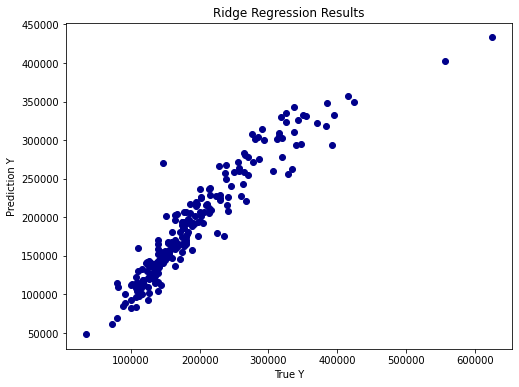

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, color = 'darkblue')
plt.title("Ridge Regression Results")
plt.xlabel('True Y')
plt.ylabel('Prediction Y')

- Despite dealing with outliers in data cleaning steps, we still have a couple of outliers. However, our R^2 is pretty good; much better than traditional linear regression! 

<p style="page-break-after:always;"></p>

### Lasso Regression

Can we do any better with Lasso Regression? Let's find out!

The intuition is the same as above; we have a lot of features and want to create a simpler model. Lasso Regression is another shrinkage method where we aim to constrain coefficient estimates. However, Lasso differs from Ridge Regression in that Lasso will force some coefficients to actually be 0. We can interpret this as similar to subset selection called variable selection

In [46]:
lassocv = LassoCV(alphas = None, max_iter = 10000, normalize = True)
lassocv.fit(X_train, y_train)
print('alpha chosen is: ', lassocv.alpha_)

alpha chosen is:  12.616232970481203


/home/mart2162/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [47]:
pred = lassocv.predict(X_test)
mse_lasso = mean_squared_error(y_test, pred)
print(mse_lasso)

1524594909.8896167


In [48]:
score_lasso = lassocv.score(X_test,y_test)
print(score_lasso)

0.7855164339771636


In [49]:
pd.Series(lassocv.coef_, index = X.columns)

MSSubClass               -3068.938013
LotFrontage                  0.000000
LotArea                   4146.405737
OverallQual              13764.728254
OverallCond               6797.607543
                             ...     
SaleCondition_AdjLand        0.000000
SaleCondition_Alloca         0.000000
SaleCondition_Family      -570.661098
SaleCondition_Normal       745.859148
SaleCondition_Partial        0.000000
Length: 221, dtype: float64

In [50]:
print("Number of non zero coefficient estimates: ", sum(pd.Series(lassocv.coef_, index= X.columns) != 0))

Number of non zero coefficient estimates:  137


In [51]:
d = {'true y': y_test, 'pred': pred}
df = pd.DataFrame(data = d)
df

,true y,pred
1299,154000,159232.328238
575,118500,111645.782039
1376,91000,89721.204868
892,154500,154845.218481
1068,151400,199913.737064
...,...,...
96,214000,212928.104326
857,174000,157289.353891
916,35311,33272.149557
273,139000,166371.482167


Text(0, 0.5, 'Prediction Y')

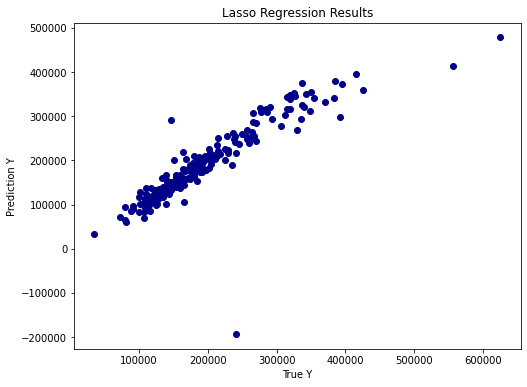

In [52]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, color = 'darkblue')
plt.title("Lasso Regression Results")
plt.xlabel('True Y')
plt.ylabel('Prediction Y')

- Our Lasso method performs worse than our Ridge Regression method. At this point, I am interested in seeing whether the results of the model change if we drastically decrease the number of features in our model. Let's start exploring this idea below.

<p style="page-break-after:always;"></p>

### Numerical Features

In this section, I will be performing Linear Regression, Ridge Regression, and Lasso Regression again, but this time on a subset of the data: only numerical values. 

We need to start by filtering the raw data and doing some quick clean up.

In [53]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [54]:
house_num = house.select_dtypes(include=[np.number]).dropna()
house_num[house_num.isna().any(axis=1)] #check

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice


In [55]:
house_num.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [56]:
X_num = house_num.drop(columns = ['Id', 'SalePrice'])
y_num = house_num['SalePrice']
# y_num_reshape = np.array(y_num).reshape(-1,1)
print(X_num.shape)
print(y_num.shape)

(1121, 36)
(1121,)


### Numerical Linear Regression

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_num, y_num, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(896, 36)
(225, 36)
(896,)
(225,)


In [58]:
reg = LinearRegression()
#pass in the data we want to fit
reg.fit(X_train,y_train)
pred = reg.predict(X_test)
mse_regnum = mean_squared_error(y_test,pred)
print(mse_regnum)

901908889.2956743


In [59]:
score_regnum = reg.score(X_test, y_test)
print(score_regnum)

0.8575625835997674


Text(0, 0.5, 'Prediction Y')

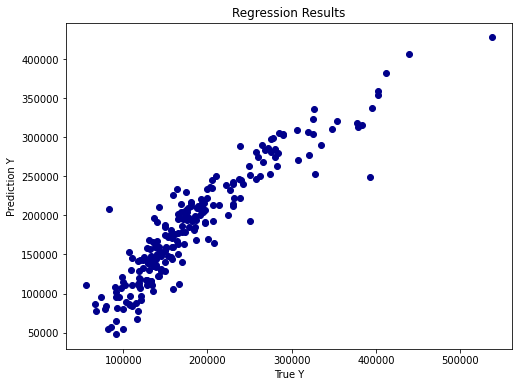

In [60]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, color = 'darkblue')
plt.title("Regression Results")
plt.xlabel('True Y')
plt.ylabel('Prediction Y')

- Our results from linear regression with only numeric variables are pretty good; much better than traditional linear regression with all features and even better than Lasso with all features. Let's see if the results also improve for Ridge.

<p style="page-break-after:always;"></p>

### Numerical Ridge Regression

We are now ready to perform Ridge Regression on only the numerical data.

In [61]:
X_normalized = X_num/X_num.std()

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_num, test_size = 0.2, random_state = 1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(896, 36)
(225, 36)
(896,)
(225,)


In [63]:
alphas = alphas[:-1]


ridgecv = RidgeCV(alphas = alphas, 
                  scoring = 'neg_mean_squared_error', 
                  normalize = True)
ridgecv.fit(X_train, y_train)
print('alpha chosen is', ridgecv.alpha_)

alpha chosen is 0.4348745013088917


/home/mart2162/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alphas to: original_alphas * n_samples. 
  warnings.warn(


In [64]:
pred = ridgecv.predict(X_test)
mse_ridgenum = mean_squared_error(y_test,pred)
print(mse_ridgenum)

949941133.8266729


In [65]:
score_ridgenum = ridgecv.score(X_test,y_test)
print(score_ridgenum)

0.8499769073789216


Text(0, 0.5, 'Prediction Y')

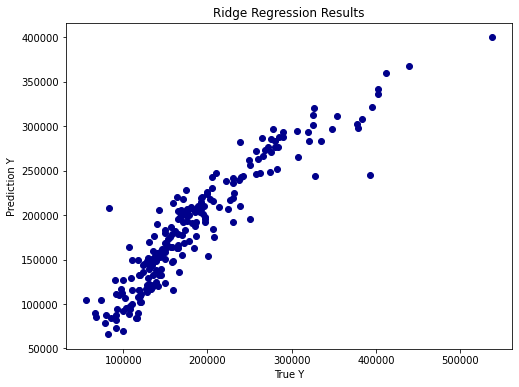

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, color = 'darkblue')
plt.title("Ridge Regression Results")
plt.xlabel('True Y')
plt.ylabel('Prediction Y')

Although we now have a simpler model, the results tell us that this model is not performing better than the Ridge Regression with our full data set. For completeness, I will also apply Lasso Regression on the numeric data below.

<p style="page-break-after:always;"></p>

### Numerical Lasso Regression

In [67]:
lassocv = LassoCV(alphas = None, max_iter = 10000, normalize = True)
lassocv.fit(X_train, y_train)
print('alpha chosen is: ', lassocv.alpha_)

alpha chosen is:  168.91453035739582


/home/mart2162/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [68]:
pred = lassocv.predict(X_test)
mse_lassonum = mean_squared_error(y_test, pred)
print(mse_lassonum)

1177793586.8921137


In [69]:
score_lassonum = lassocv.score(X_test,y_test)
print(score_lassonum)

0.8139924358649071


In [70]:
pd.Series(lassocv.coef_, index = X_num.columns)

MSSubClass       -2574.311461
LotFrontage          0.000000
LotArea            668.089444
OverallQual      32882.075222
OverallCond          0.000000
YearBuilt          868.323415
YearRemodAdd      4385.047671
MasVnrArea        3574.913857
BsmtFinSF1        4996.491444
BsmtFinSF2           0.000000
BsmtUnfSF           -0.000000
TotalBsmtSF       2054.481446
1stFlrSF          2959.634791
2ndFlrSF             0.000000
LowQualFinSF        -0.000000
GrLivArea        19191.181814
BsmtFullBath       570.590160
BsmtHalfBath        -0.000000
FullBath             0.000000
HalfBath             0.000000
BedroomAbvGr        -0.000000
KitchenAbvGr      -753.513804
TotRmsAbvGrd         0.000000
Fireplaces        2553.361443
GarageYrBlt          0.000000
GarageCars       11198.917734
GarageArea         361.891203
WoodDeckSF           0.000000
OpenPorchSF          0.000000
EnclosedPorch       -0.000000
3SsnPorch            0.000000
ScreenPorch          0.000000
PoolArea            -0.000000
MiscVal   

In [71]:
print("Number of non zero coefficient estimates: ", sum(pd.Series(lassocv.coef_, index= X_num.columns) != 0))

Number of non zero coefficient estimates:  15


Text(0, 0.5, 'Prediction Y')

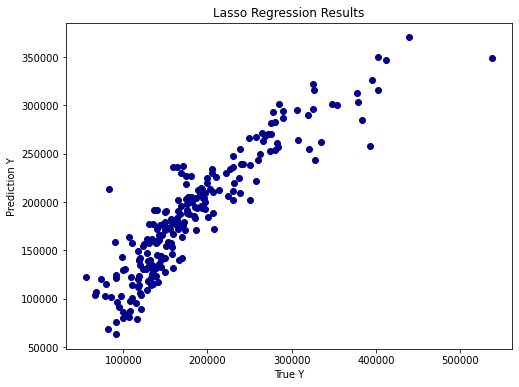

In [72]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, color = 'darkblue')
plt.title("Lasso Regression Results")
plt.xlabel('True Y')
plt.ylabel('Prediction Y')

The results of the Lasso Regression on the numeric dataframe does better than the results from the Lasso Regression with the complete data frame. However, it still does not perform as well as our first model: the Ridge Regression with the complete data frame.

<p style="page-break-after:always;"></p>

### Conclusions and Results

In [73]:
list_mse = [mse_reg, mse_ridge, mse_lasso, mse_regnum, mse_ridgenum, mse_lassonum]
list_score = [score_reg, score_ridge, score_lasso, score_regnum, score_ridgenum, score_lassonum]
names = ['Regression','Ridge', 'Lasso', 'Regression Numerric','Ridge Numeric', 'Lasso Numeric']

In [74]:
results = pd.DataFrame(list(zip(names, list_mse, list_score)),
               columns =['Model', 'MSE', 'R^2 Score'])
results

,Model,MSE,R^2 Score
0,Regression,2.673282e+09,0.623916
1,Ridge,8.557502e+08,0.879611
2,Lasso,1.524595e+09,0.785516
3,Regression Numerric,9.019089e+08,0.857563
4,Ridge Numeric,9.499411e+08,0.849977
5,Lasso Numeric,1.177794e+09,0.813992


Overall, the goal of this project was to create a model(s) that predicts house prices given a data set. I specifically chose this project to challenge my skills with intuiting appropriate models given a data set. I also specficially chose a data set with a large number of features to challenge myself to work with larger data than traditionally seen in class. I can confirm that it was definitely a challenge! I have been told that the job of a Data Scientist is 90% data cleaning and 10% building the models. Due to time constraints and for simplicity, I chose relatively naive approaches (like dropping all columns with NaN's) to clean up the data. It may be interesting to revisit this project as an older and wiser Data Scientist with different approaches to data cleaning and dealing with outliers.

In regards to choosing the statistical learning models, the large number of features lead me to choose shrinkage methods. I began by creating a traditional linear regression model as baseline. Linear regression aims to predict the value of the response variable based on the values of predictor variables. I began fitting the model on the entire data set (after cleaning of course). Essentially, this consisted of 74 predictor variables, which turned into 220 variables after converting categorical variables to numereic. From the results of my linear regression, we had an R^2 value of 0.62. I propose that we had too much noise from an excessive number of predictor variables. For this reason, I chose to move forward with shrinkage methods. 

I then applied a Ridge Regression model to this data set. It is important to note that shrinkage methods should not be applied blindly. Ridge Regression is a shrinkage method that aims to constrain coefficient estimates toward 0. Ridge is most suitable when the number of predictors is larger than the number of data points. Although this is not the case, we still have a large number of predictors that I would like to shrink to see if our model improves. Ridge regression also works best when least squares estimates have high variance. After training and testing the model, the Ridge Regression had an R^2 score of 0.88. That is pretty good! From the results, it appears that data points with extremely high SalePrice's are acting as outliers in our data, which may be leading to the R^2 only being 0.88. Moving forward with Lasso Regression, my intuition for using this model was similar to my intuition for using Ridge Regression; we have a lot of features and want to create a simpler model. Lasso Regression is another shrinkage method where we aim to constrain coefficient estimates. However, Lasso differs from Ridge Regression in that Lasso will force some coefficients to actually be 0. We can interpret this as similar to subset selection called variable selection. My results from the Lasso Regression were much worse than results from the Ridge Regression. For this reason, I was interested in manually decreasing the number of input variables by only utilizing the numerical predictor values.

Utilizing only the numerical predictor values decreased my input variables from 220 to 36. That's a large decrease! I applied Linear Regression, Ridge Regression, and Lasso Regression again on these numerical predictor values. The Linear Regression model had the largest increase in terms of R^2 score; the R^2 score was 0.86. That's pretty good! The Ridge Regression had a lower accuracy when using only numerical values, however, the Lasso Regression saw an increase in accuracy when using only numerical values.

In the table above, I summarised all MSE and R^2 values from all models that were trained and tested. We see a large MSE for all models; although, when we think about the magnitude of the target variable, it may not be as large as it appears. We can validate that with our R^2 score. Overall, we see Ridge Regression performing best compared to Lasso Regression when utilizing the full data set. Simplifying our data set to only numerical values did not help us in the grand scheme of things, although it did improve our Linear Regression model by a lot and Lasso model. In conclusion, our best model was our Ridge Regression model on the complete data set.

Overall, I found this project extremely worthwhile. As a young Data Scientist, passion projects are very important to me as they allow me to grow my skills in something that I am personally interested in. I felt that I learned a great deal from this project. Statistical learning models can only be as good as the input data. With that, I would be interested in revisiting this project and applying more advanced methods to dealing with NaN's and outliers. 